<a href="https://colab.research.google.com/github/ccopenh1/personal-projects/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Clustering

> Clustering wines based on their chemical constituents



# INTRODUCTION

For Project 4, I would like to cluster wines based on their chemical constituents (e.g., Alcohol, Malic acid, Ash, etc.) to enhance the understanding of wine characteristics and production processes. This project will apply Hierarchical and K-Means Clustering algorithms!



# What is Clustering(Hierarchical):

Hierarchical clustering is a versatile unsupervised machine learning algorithm used for grouping similar data points into clusters based on their proximity to each other, but unlike K-means clustering, which requires the number of clusters (K) to be specified beforehand, hierarchical clustering does not require the predefinition of the number of clusters. Instead, it builds a hierarchy of clusters, which can be visualized as a dendrogram.

# Here's how it works at a high level:

Agglomerative Approach: Hierarchical clustering typically follows an agglomerative approach, where each data point starts as a single cluster, and pairs of clusters are successively merged based on their similarity until there is only one cluster containing all data points. Divisive hierarchical clustering, the opposite approach, starts with all data in one cluster and recursively divides it into smaller clusters.

Measure of Similarity: A distance or similarity measure is used to quantify the similarity between data points or clusters. Common distance metrics include Euclidean distance, Manhattan distance, and cosine similarity. The choice of similarity measure depends on the nature of the data and the clustering objectives.

Building the Hierarchy: The algorithm iteratively merges or divides clusters based on their similarity until a stopping criterion is met. This process is represented visually as a dendrogram, which illustrates the hierarchical relationships between clusters and the order of their merging or splitting.

Dendrogram Pruning: The dendrogram can be cut at different heights to obtain a specific number of clusters. The optimal number of clusters can be determined based on domain knowledge or using techniques such as the elbow method or silhouette analysis.

Output: Once the desired number of clusters is obtained, the final cluster assignments are determined based on the hierarchical structure. Each data point is associated with a specific cluster.


I chose to use hierarchical clustering for its flexibility and ability to capture hierarchical relationships in the data. It does not require specifying the number of clusters beforehand and can handle datasets with irregular shapes or varying densities.

However, hierarchical clustering can be computationally intensive, especially for large datasets, and the interpretation of the dendrogram may be subjective. Additionally, the choice of linkage method (e.g., single linkage, complete linkage, average linkage) can significantly affect the resulting clusters.

# What is Clustering(K-Means):

K-Means clustering, one of the most popular ML algorithms for clustering, partitions data into K clusters, where each data point belongs to the cluster with the nearest mean. It's relatively efficient and works well for spherical clusters. It is an unsupervised algorithm, meaning it can find patterns in data without being trained on labeled data with known outputs.

# Here's how it works at a high level:

Initialization: The algorithm starts by randomly selecting K points from the dataset as the initial cluster centroids. These centroids can be randomly chosen or selected strategically based on prior knowledge of the data.

Assignment: Each data point is then assigned to the cluster whose centroid is nearest to it. The "nearest" centroid is usually determined by calculating the Euclidean distance between each data point and each centroid. This step effectively partitions the data into K clusters.

Update centroids: After all data points have been assigned to clusters, the centroids are updated by computing the mean of all data points assigned to each cluster. This moves the centroids to the center of their respective clusters.

Repeat: Steps 2 and 3 are repeated iteratively until convergence, meaning that the centroids no longer change significantly or a predetermined number of iterations is reached.

Convergence: The algorithm converges when the centroids stabilize, meaning that the assignments of data points to clusters no longer change or change very little between iterations.

Output: Once the algorithm converges, the final cluster assignments are obtained, and each data point is associated with a specific cluster.

I chose to use K-means for its simplicity; it is straightforward to understand and implement. It is also very easy for any observer to interpret the output and characteristics of each cluster.

Unfortunately, outliers can significantly impact the centroids and the resulting clusters in K-means clustering, and the algorithm may converge to a local optimum rather than the global optimum, especially with a poor choice of initial centroids.

# DATA INTRODUCTION:

This dataset is derived from the Wine Data Set [available at the UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine). However, it has been modified for unsupervised learning purposes by removing information about the types of wine, thus making it suitable for clustering analysis.

The original dataset comprises the results of a chemical analysis of wines produced in the same region of Italy but originating from three different cultivars. The analysis provides information on the quantities of 13 different constituents present in each of the wine samples.

# Here are the attributes included in the dataset:

**Alcohol**: The alcohol content of the wine.


**Malic acid**: The amount of malic acid present in the wine.


**Ash**: The ash content of the wine.


**Alcalinity of ash**: The alkalinity of the ash in the wine.


**Magnesium**: The magnesium content of the wine.


**Total phenols**: The total phenolic content in the wine.


**Flavanoids**: The flavonoid content in the wine.


**Nonflavanoid phenols**: The non-flavonoid phenolic content in the wine.


**Proanthocyanins**: The proanthocyanin content in the wine.


**Color intensity**: The intensity of color in the wine.


**Hue**: The hue of the wine.


**OD280/OD315 of diluted wines**: The OD280/OD315 ratio of diluted wines*


**Proline**: The proline content in the wine.


With these attributes, we can explore the chemical composition of the wines and potentially identify patterns or clusters that emerge within the dataset using unsupervised learning techniques such as clustering.

*refers to a dimensionless quantity that represents the ratio of the absorbance at two different wavelengths (280nm and 315nm) of light passing through a solution of diluted wine. This measurement is often used in chemical analysis, particularly in spectroscopy, to assess characteristics of the wine related to its composition and properties.

# DATA UNDERSTANDING AND VISUALIZATION

Import necessary modules/packages

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

Read csv data into pandas DataFrame df

In [53]:
df=pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


 178 rows and 13 columns. This means that there are 178 wine samples in the dataset, and each sample has 13 chemical constituents measured.

In [54]:
df.shape

(178, 13)

Peek at the columns

In [55]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

df.info() will tell us the total number of entries (rows) in the DataFrame,
the number of columns in the DataFrame,
the data type of each column,
the number of non-null values in each column, and
Memory usage of the DataFrame.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


df.describe() will provide very handy descriptive statistics summarizing the central tendency, dispersion, and shape of the numerical attributes (columns)

In [57]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Too many decimals looks messy, let's round to just 1.

In [58]:
round(df.describe(),1)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.3,2.4,19.5,99.7,2.3,2.0,0.4,1.6,5.1,1.0,2.6,746.9
std,0.8,1.1,0.3,3.3,14.3,0.6,1.0,0.1,0.6,2.3,0.2,0.7,314.9
min,11.0,0.7,1.4,10.6,70.0,1.0,0.3,0.1,0.4,1.3,0.5,1.3,278.0
25%,12.4,1.6,2.2,17.2,88.0,1.7,1.2,0.3,1.2,3.2,0.8,1.9,500.5
50%,13.0,1.9,2.4,19.5,98.0,2.4,2.1,0.3,1.6,4.7,1.0,2.8,673.5
75%,13.7,3.1,2.6,21.5,107.0,2.8,2.9,0.4,2.0,6.2,1.1,3.2,985.0
max,14.8,5.8,3.2,30.0,162.0,3.9,5.1,0.7,3.6,13.0,1.7,4.0,1680.0


What columns are not of type int64?

In [59]:
[i for i in df.columns if df[i].dtypes != 'int64']

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280']

These columns contain continuous numerical data.

In [60]:
continous = [i for i in df.columns if df[i].dtypes != 'int64']

Lets create pairwise scatterplots and histograms for the continuous numerical variables

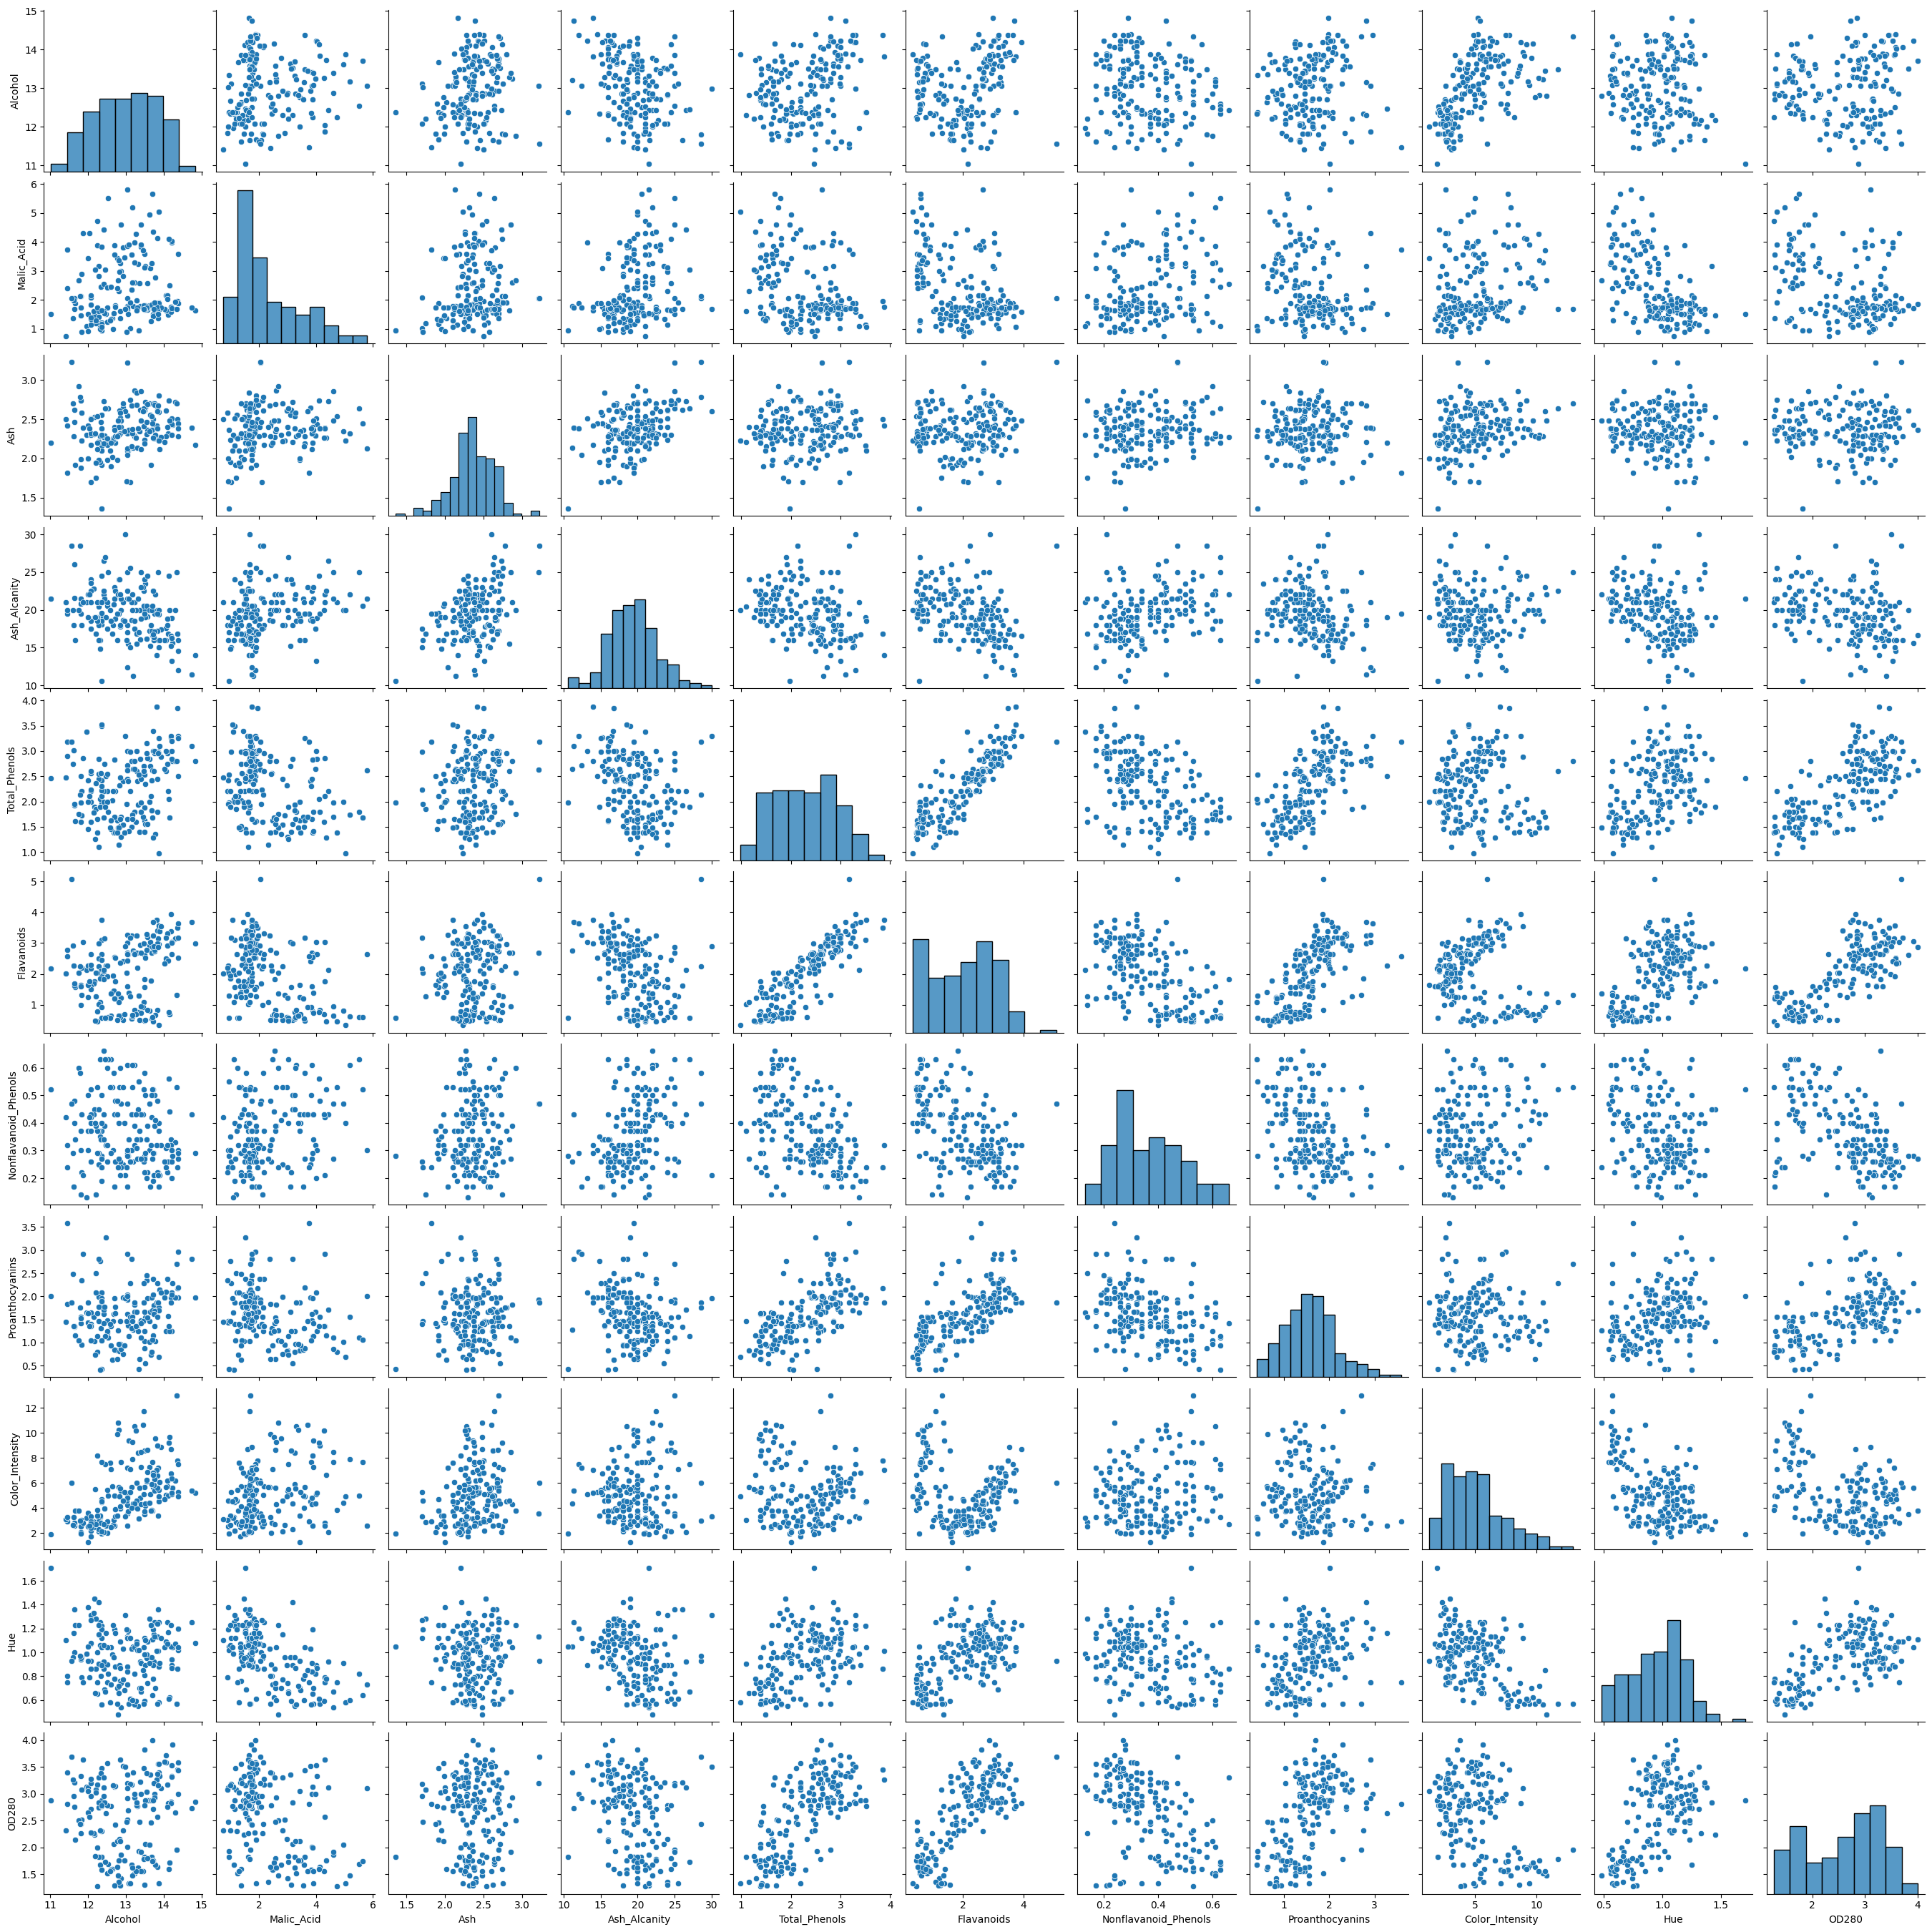

In [61]:
sns.pairplot(vars = continous,data = df)

Any null values?

In [62]:
df.isnull().sum() #nope

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Any duplicates?

In [63]:
df.duplicated().sum() #nope

0

How many unique values per column?

In [64]:
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

We will use a correlation matrix to measure the strength and direction of the linear relationship(s) between two variables.

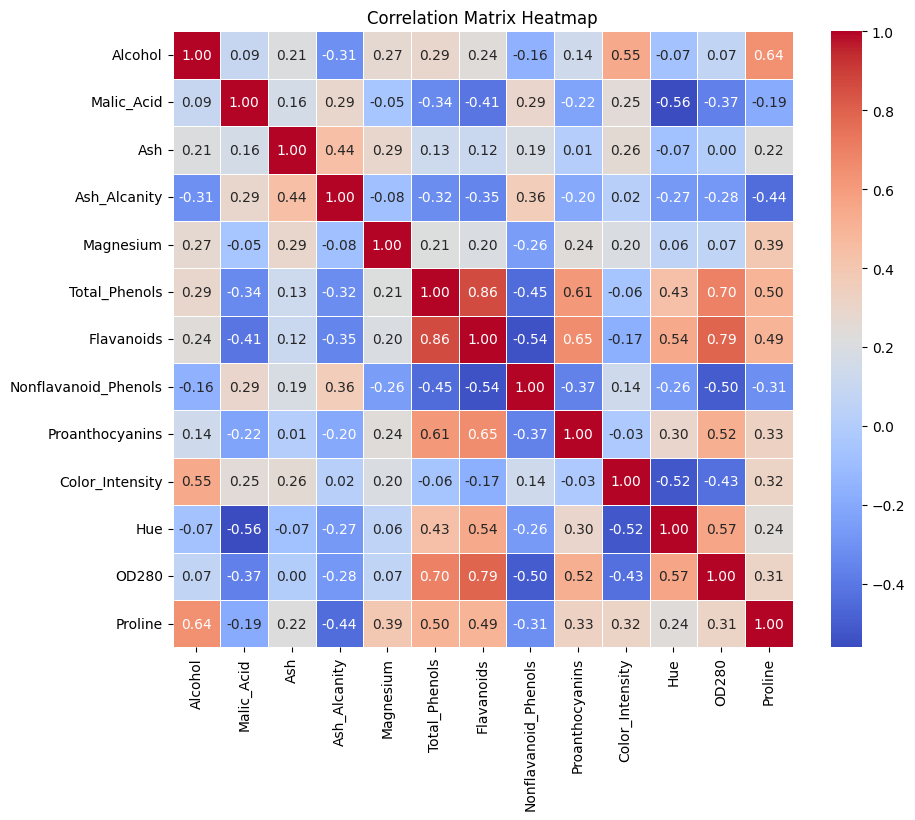

In [65]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

We can clearly see the strongest and weakest relationships; Flavanoids and Total_Phenols have the highest correlation coefficient of 0.86. Malic_Acid and Hue have the lowest correlation coefficient of -0.56.

# MODELING

# Hierarchical Clustering

Let's begin with constructing a Hierarchical Clustering Dendrogram using the Ward linkage method, which minimizes the variance when forming clusters and  tends to produce balanced and compact clusters.

In [66]:
hier_clust = linkage(df, method = 'ward')

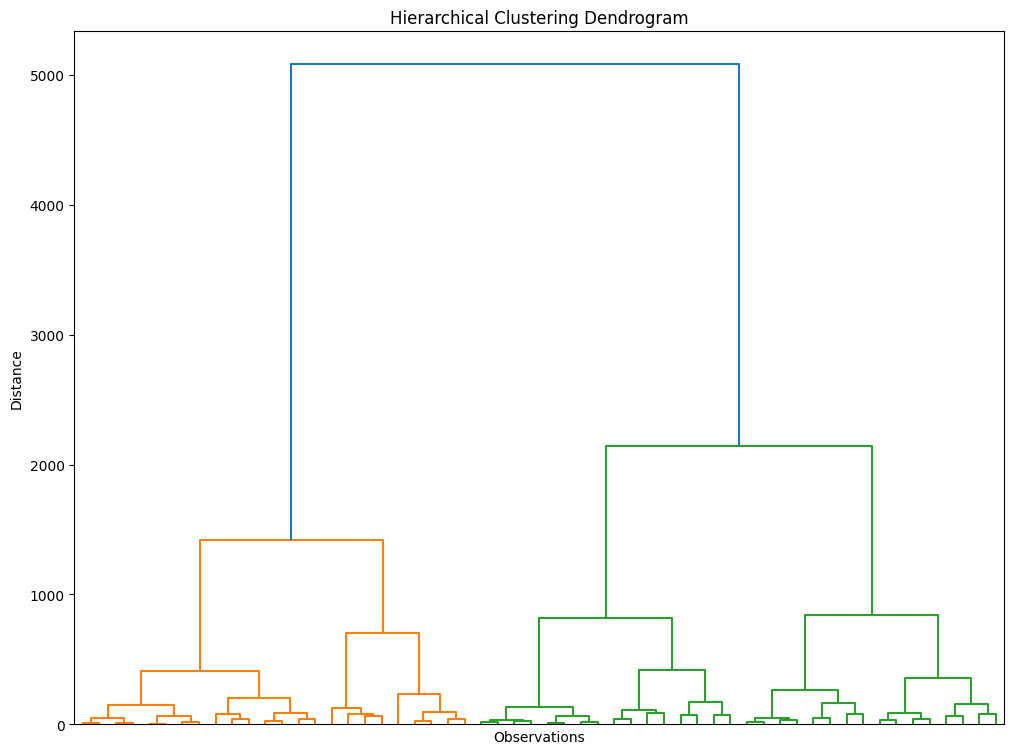

In [67]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

In [97]:
# Perform hierarchical clustering
hier_clust = linkage(df, method='ward')

# Obtain cluster labels
from scipy.cluster.hierarchy import fcluster
k = 3  # specify the number of clusters
labels = fcluster(hier_clust, k, criterion='maxclust')

# Calculate silhouette score
silhouette_avg = silhouette_score(df, labels, metric='euclidean')

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5962366979560179


A silhouette score of approximately 0.5962 indicates that the clustering algorithm has effectively grouped similar data points together while keeping different groups separate, resulting in a meaningful and reliable clustering structure.

# K-means Clustering

To determine the optimal number of clusters K, we will use the Elbow Method.

wcss = []: This initializes an empty list wcss to store the within-cluster sum of squares (WCSS) for each value of K.

for i in range(1,11): This loop iterates over a range of values from 1 to 10 (inclusive). These values represent the number of clusters (K) that will be evaluated.

kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=np.random.randint(1000)): Within the loop, a K-means clustering model is instantiated. The n_clusters parameter is set to the current value of i, which represents the number of clusters being evaluated. init='k-means++' specifies the initialization method to use, and random_state=np.random.randint(1000) generates a random integer seed each time the algorithm runs.

kmeans.fit(df): The K-means model is fitted to the input dataset df, clustering the data into i clusters.

wcss.append(kmeans.inertia_): After fitting the model, the within-cluster sum of squares (WCSS) is calculated using the inertia_ attribute of the K-means model and appended to the wcss list. WCSS represents the sum of squared distances between each data point and its centroid within the cluster.

In [68]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=np.random.randint(1000))
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

After the loop completes, wcss will contain the WCSS values for each value of K (from 1 to 10). The Elbow Method involves plotting these WCSS values against the number of clusters (K) and selecting the value of K at the "elbow point," where the rate of decrease in WCSS slows down significantly. This point represents an optimal balance between the number of clusters and the compactness of each cluster.

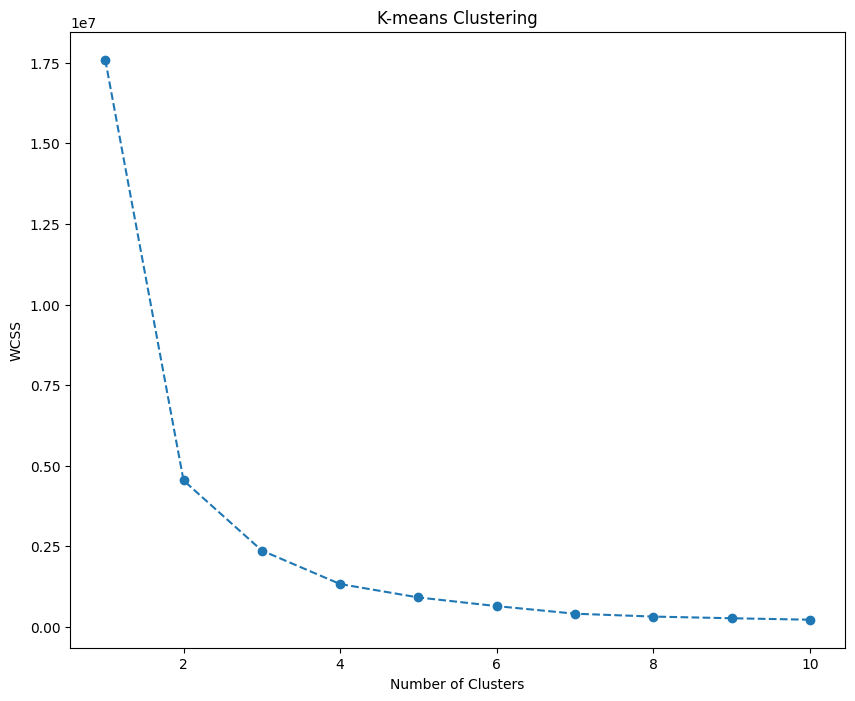

In [69]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

It is most optimal to divide the data into 2 clusters.

In [70]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=np.random.randint(1000))

In [71]:
pred = kmeans.fit_predict(df) #fits a K-means clustering model to df and returns the cluster labels assigned to each data point based on the fitted model.

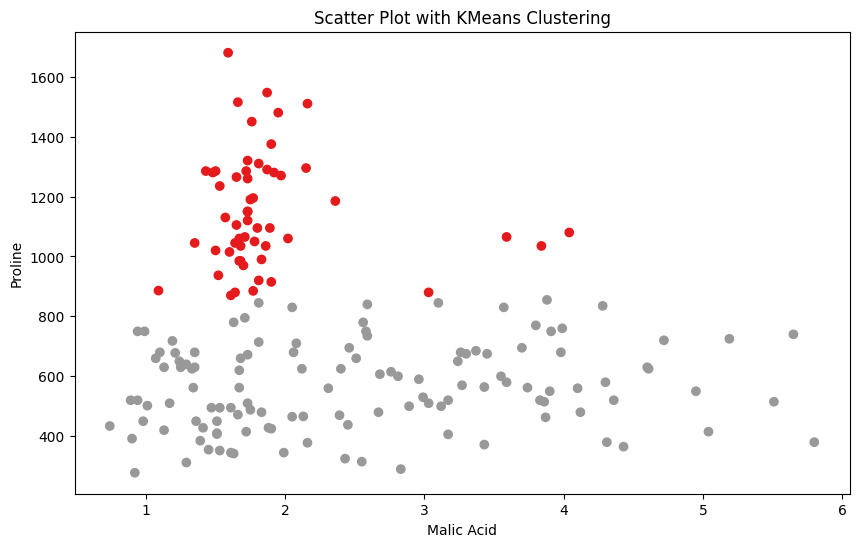

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Malic_Acid'], df['Proline'], c=pred, cmap='Set1')
plt.title('Scatter Plot with KMeans Clustering')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.show()

In [73]:
silhouette_score(df, labels=kmeans.labels_, metric='euclidean') #calculates the silhouette score for the clustered data points using the Euclidean distance metric.

0.6568536504294317

A silhouette score of 0.6568, being closer to 1, suggests that the clustering result is strong, with well-defined clusters and good separation between them.

Let's try a consistent random seed for further testing.

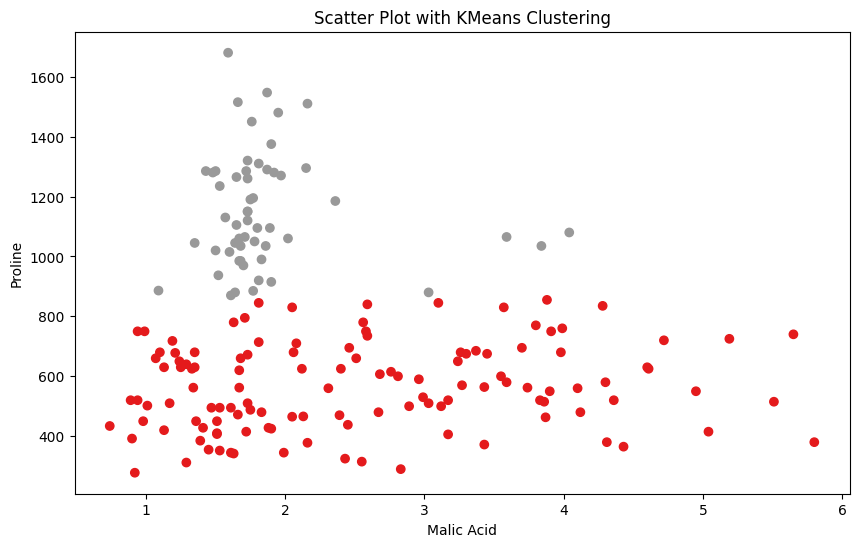

In [77]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=0)
pred = kmeans.fit_predict(df) #fits a K-means clustering model to df and returns the cluster labels assigned to each data point based on the fitted model.
plt.figure(figsize=(10, 6))
plt.scatter(df['Malic_Acid'], df['Proline'], c=pred, cmap='Set1')
plt.title('Scatter Plot with KMeans Clustering')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.show()

In [78]:
silhouette_score(df, labels=kmeans.labels_, metric='euclidean') #calculates the silhouette score for the clustered data points using the Euclidean distance metric.

0.6568536504294317

Let's try using 3 clusters instead of 2

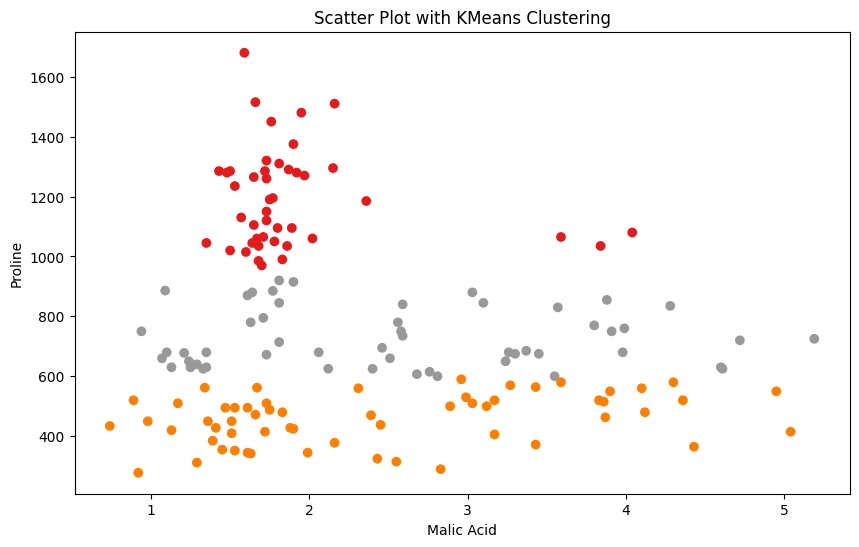

In [98]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)
pred = kmeans.fit_predict(df) #fits a K-means clustering model to df and returns the cluster labels assigned to each data point based on the fitted model.
plt.figure(figsize=(10, 6))
plt.scatter(df['Malic_Acid'], df['Proline'], c=pred, cmap='Set1')
plt.title('Scatter Plot with KMeans Clustering')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.show()

In [99]:
silhouette_score(df, labels=kmeans.labels_, metric='euclidean') #calculates the silhouette score for the clustered data points using the Euclidean distance metric.

0.566995390812624

A lower score for 3 clusters vs 0.6568536504294317 for 2 clusters

Lets revisit the continuous data and identify any outliers that may have hindered the accuracy of the K-means model.

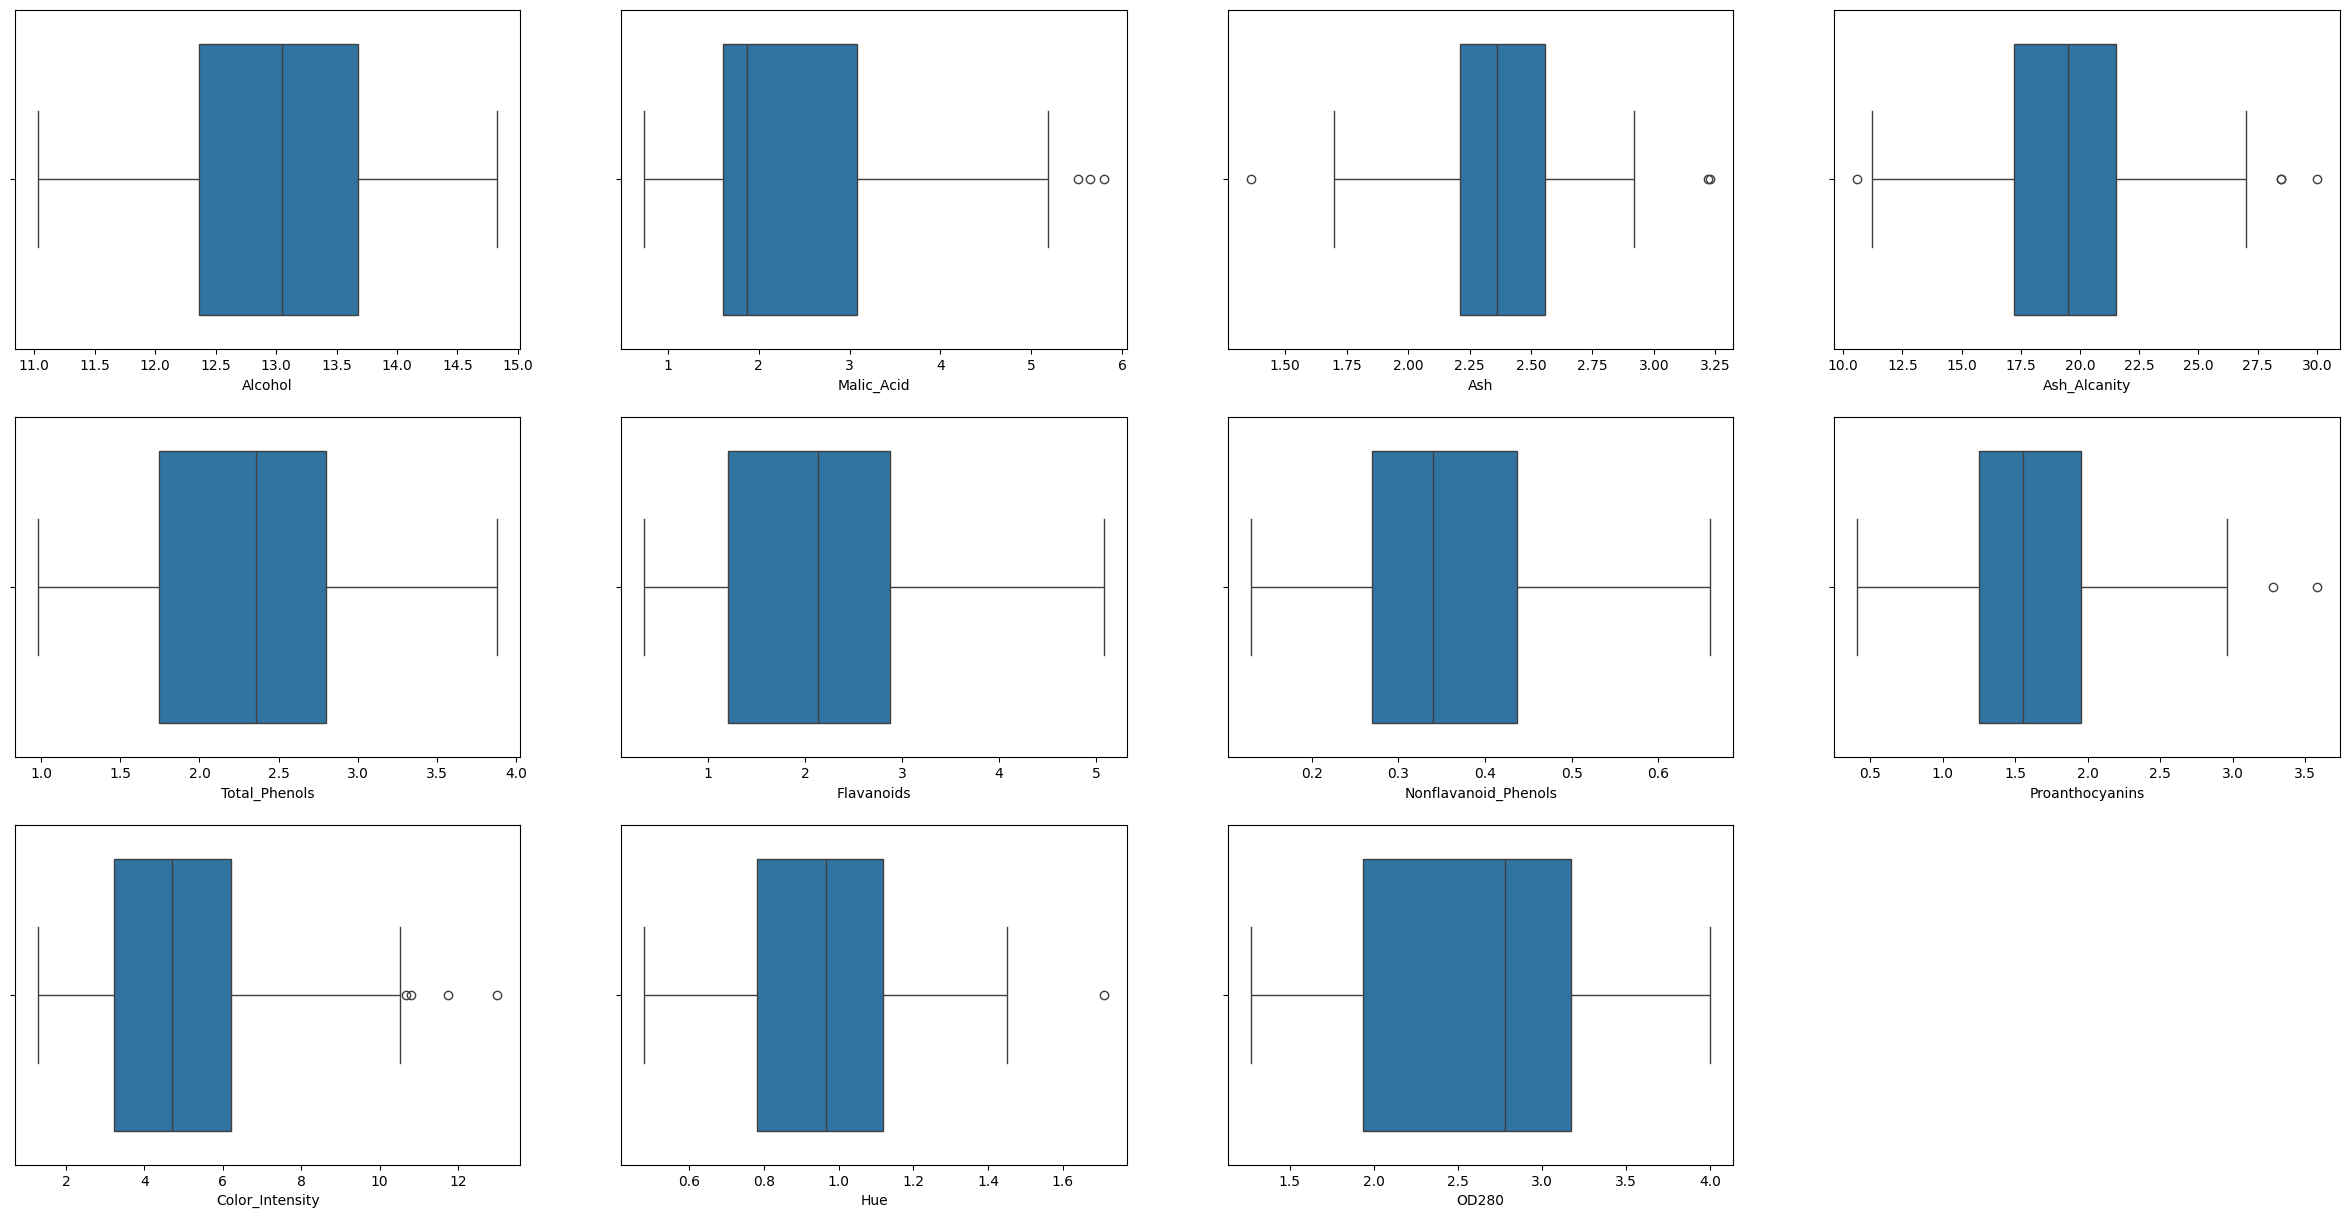

In [79]:
plt.figure(figsize = (30,15))
m = 1
for i in continous:
    plt.subplot(3,4,m)
    sns.boxplot(x = df[i])
    m += 1

The data appears to be mostly symmetrical for variables such as "Flavanoids", "Hue", and "OD280". However, other variables like "Malic_Acid" and "Magnesium" exhibit significant right-skewness, while "Alcohol" and "Ash" have slight left-skewness.

In [80]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

In [86]:
outliers_index = [] #list of outliers
for i in continous:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        ll = Q1 -1.5*IQR
        ul = Q3+1.5*IQR
        if len(df[(df[i] < ll) | (df[i] > ul)]) > 0:
             outliers_index.append(df[(df[i] < ll) | (df[i] > ul)].index.to_list())
print(*outliers_index)

[66, 76, 100] [14, 50, 124] [166]


In [87]:
df = df.drop([166, 14,50,124, 66,76,100],axis = 0) #get rid of them

Updated Box Plots

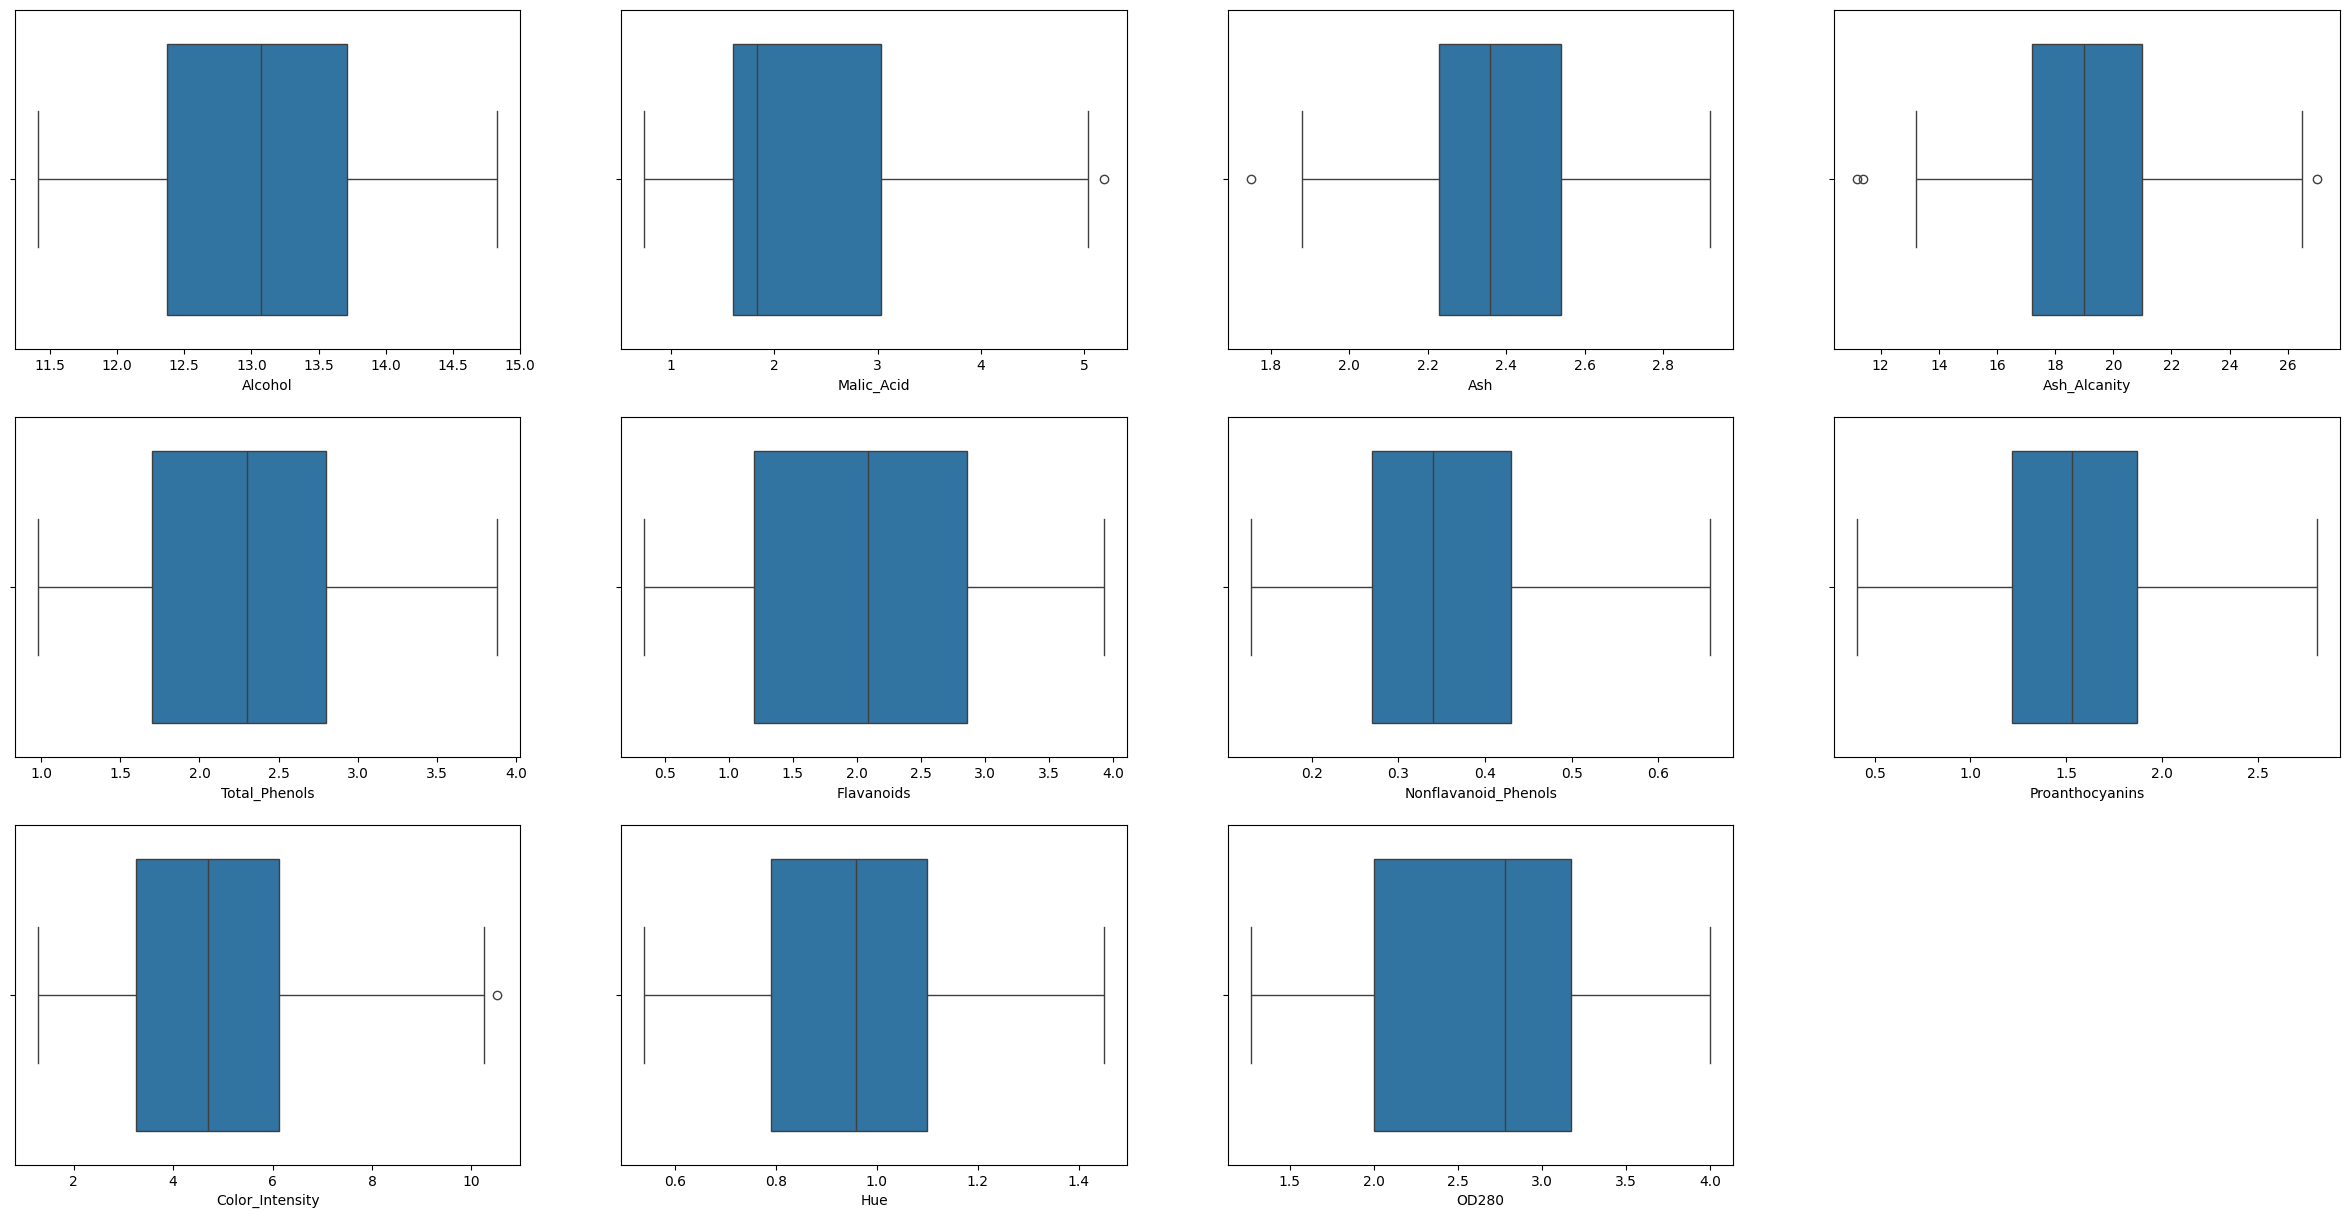

In [88]:
plt.figure(figsize = (30,15))
m = 1
for i in continous:
    plt.subplot(3,4,m)
    sns.boxplot(x = df[i])
    m += 1

Same steps for discrete variables in the dataset

In [89]:
discrete_count = [i for i in df.columns if df[i].dtypes == 'int64']

In [90]:
discrete_count

['Magnesium', 'Proline']

In [92]:
outliers_index = [] #list of outliers
for i in discrete_count:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        ll = Q1 -1.5*IQR
        ul = Q3+1.5*IQR
        if len(df[(df[i] < ll) | (df[i] > ul)]) > 0:
             outliers_index.append(df[(df[i] < ll) | (df[i] > ul)].index.to_list())
print(*outliers_index)

[69, 78]


In [93]:
df = df.drop([69,78],axis = 0) #get rid of them

Updated Box Plots

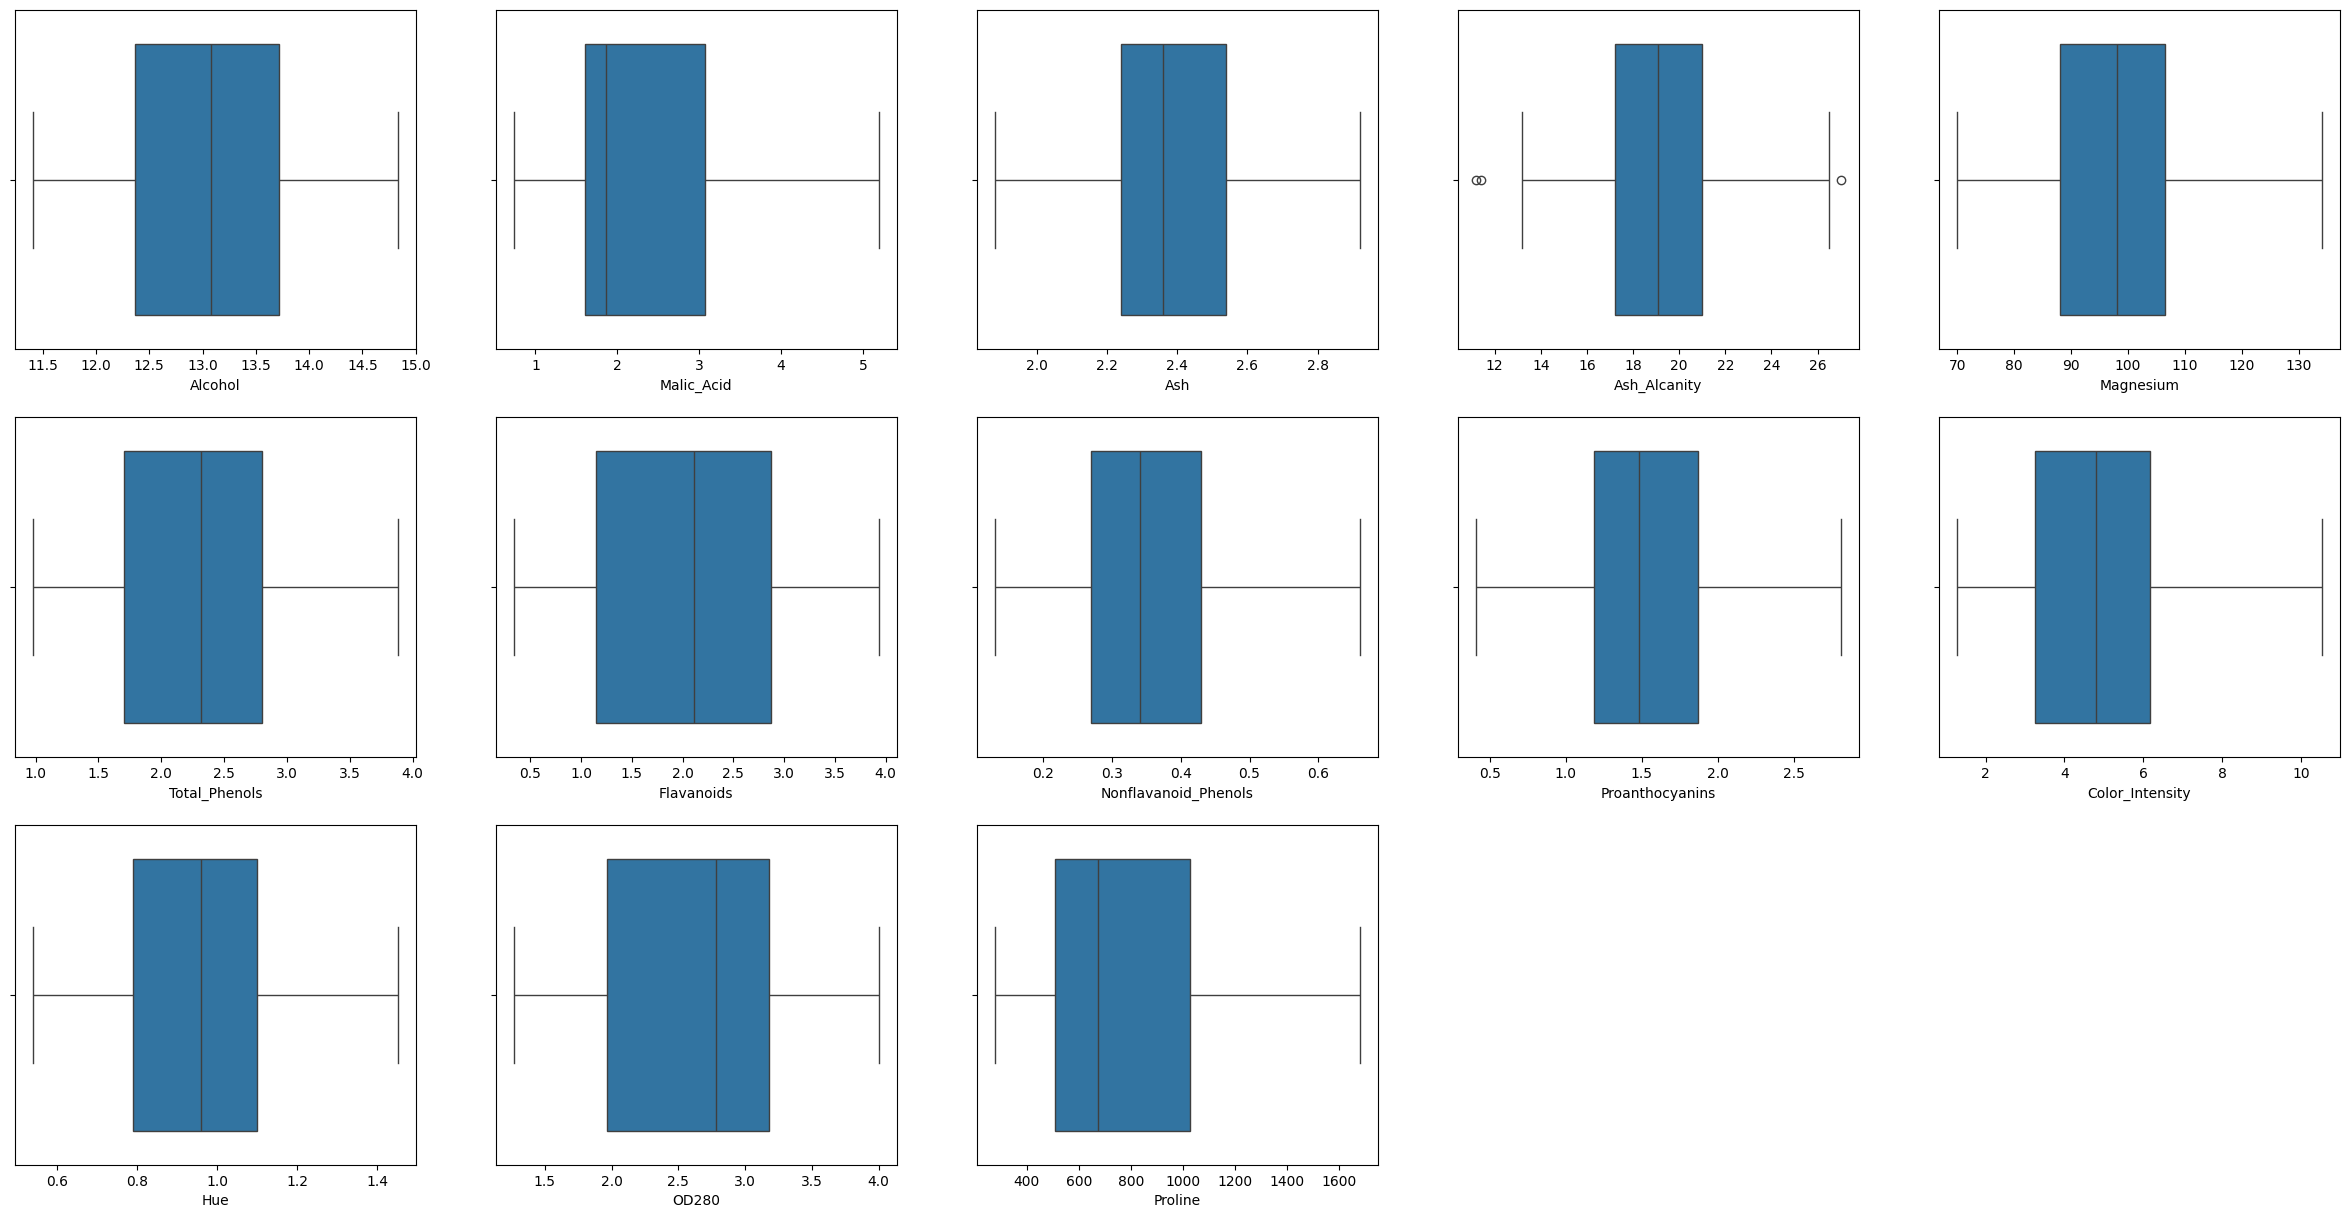

In [94]:
plt.figure(figsize = (30,15))
m = 1
for i in df.columns:
    plt.subplot(3,5,m)
    sns.boxplot(x = df[i])
    m += 1

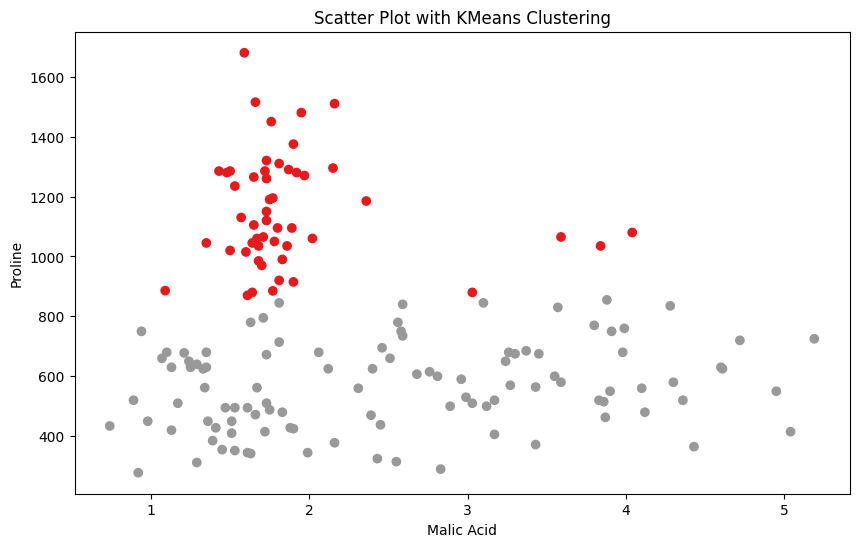

In [95]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=0)
pred = kmeans.fit_predict(df) #fits a K-means clustering model to df and returns the cluster labels assigned to each data point based on the fitted model.
plt.figure(figsize=(10, 6))
plt.scatter(df['Malic_Acid'], df['Proline'], c=pred, cmap='Set1')
plt.title('Scatter Plot with KMeans Clustering')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.show()

In [96]:
silhouette_score(df, labels=kmeans.labels_, metric='euclidean') #calculates the silhouette score for the clustered data points using the Euclidean distance metric.

0.6572018859996558

slightly improved vs 0.6568536504294317

# STORYTELLING

In my wine clustering project, I embarked on a journey to uncover hidden patterns within a dataset containing various chemical constituents of wines. My exploration led me to employ hierarchical clustering, a method that organizes data points into a hierarchy of clusters, revealing the similarities and differences among them. My hierarchical model unveiled three distinct clusters, each representing a unique profile within the dataset. With a silhouette score of 0.5962, my clustering model showcased a decent level of separation and cohesion among the clusters. However, there are alternative methods for optimimal clustering. Utilizing the elbow method for K-means clustering, I sought to identify the ideal number of clusters. Surprisingly, the elbow method pointed towards two clusters as the optimal choice. Intrigued by this, I evaluated K-means clustering with two and three clusters, yielding silhouette scores of 0.6569 and 0.5670, respectively. Striving for refinement, I addressed the influence of outliers by removing them from my dataset, resulting in a minor but notable improvement in my K-means clustering with two clusters, achieving a silhouette score of 0.6572. This modeling work with hierarchical and K-means clustering not only illuminated the intricate structure of the wine dataset but also emphasized the crucial role of iterative exploration in data analysis.

# IMPACT

The goal of my wine clustering project is to empower consumers by offering insights into wine composition, so they can easily decide which wines are right for them. Additionally, my project can impact the wine production industry by assisting producers with labeing/classifying wines correctly. Despite potential challenges like market uniformity and external pressures, my project remains committed to its mission of aiding new discoveries about relationships between unique characteristics of wines. Ultimately, it aims to create a landscape where consumers feel confident and informed when selecting wines, driving positive change within the industry.

# REFERENCES

https://archive.ics.uci.edu/dataset/109/wine
https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?resource=download

https://chat.openai.com/